In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('SF_salaries.csv')
df = df[df['BasePay'] != 'Not Provided']
print(df.shape)
df.head()

(148650, 13)


/Users/andersource/miniconda3/envs/edu/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [16]:
for col in ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']:
    df[col] = df[col].astype(float)

In [17]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148650.000000,148045.000000,148650.000000,148650.000000,112491.000000,148650.000000,148650.000000,148650.000000,0.0
mean,74325.500047,66325.448840,5066.059886,3648.767297,25007.893151,74770.333901,93695.075969,2012.522603,NaN
std,42911.703176,42764.635495,11454.380559,8056.601866,15402.215858,50516.196009,62792.497391,1.117526,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37163.250000,33588.200000,0.000000,0.000000,11535.395000,36169.955000,44073.337500,2012.000000,NaN
50%,74325.500000,65007.450000,0.000000,811.270000,28628.620000,71427.240000,92406.020000,2013.000000,NaN
75%,111487.750000,94691.050000,4658.175000,4236.065000,35566.855000,105842.960000,132877.992500,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


In [18]:
df['JobTitle'].drop_duplicates().shape

(2158,)

In [20]:
df['JobTitle'].str.lower().value_counts()[:20]

transit operator                9424
special nurse                   5791
registered nurse                4955
custodian                       3214
firefighter                     3153
recreation leader               2663
deputy sheriff                  2618
public svc aide-public works    2518
police officer 3                2421
patient care assistant          1945
public service trainee          1656
attorney (civil/criminal)       1503
police officer                  1476
porter                          1465
general laborer                 1410
gardener                        1187
police officer 2                1141
parking control officer         1140
library page                    1107
senior clerk                    1064
Name: JobTitle, dtype: int64

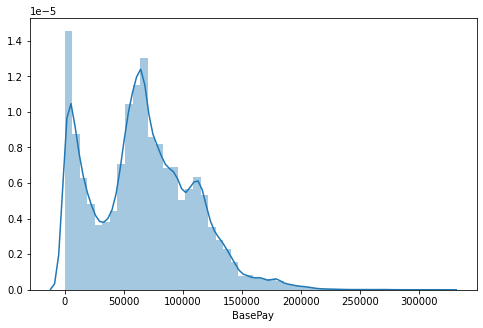

In [23]:
plt.subplots(figsize=(8, 5))
sns.distplot(df['BasePay'])
plt.show()

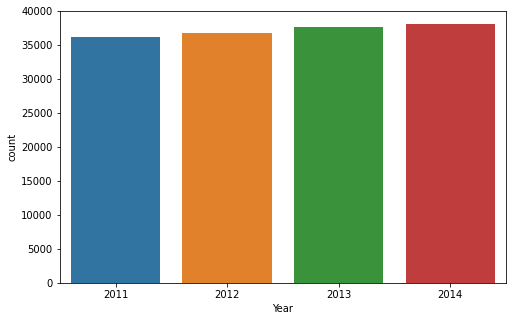

In [24]:
plt.subplots(figsize=(8, 5))
sns.countplot(df['Year'])
plt.show()

In [26]:
pay_by_year = df.groupby('Year').agg(mean_basepay=('BasePay', 'mean')).reset_index(drop=False)

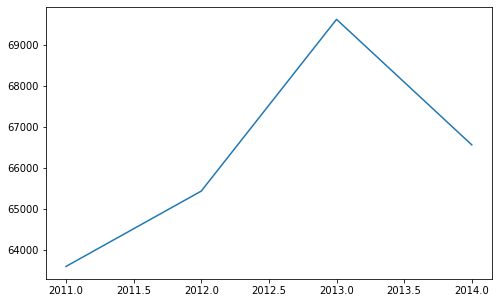

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(pay_by_year['Year'], pay_by_year['mean_basepay'])
plt.show()

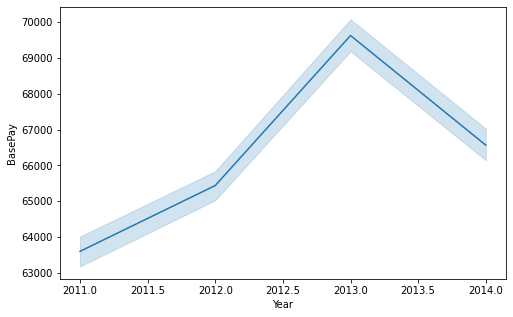

In [30]:
plt.subplots(figsize=(8, 5))
sns.lineplot(data=df, x='Year', y='BasePay')
plt.show()

In [32]:
df['EmployeeName'].value_counts().max()

13